##### Purpose of the notebook ####

Explore gene modules present within different cell types, defining subtypes. In this case: oligodendrocytes.

In [1]:
import scanpy as sc
import infercnvpy as cnv
import matplotlib.pyplot as plt
import warnings

In [2]:
adata=sc.read('/media/sergio/Meninges/CosMx-WTx/WTx-CosMx/raw-B-1970164-01-04_2/adata_1970164.h5ad')

/home/sergio/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
adata.var.index=adata.var['names']

In [3]:
dat = cnv.datasets.maynard2020_3k()
dat.var.loc[:, ["ensg", "chromosome", "start", "end"]].head()

  0%|          | 0.00/49.5M [00:00<?, ?B/s]

ensg chromosome      start        end
symbol                                                        
AL645933.5  ENSG00000288587.1       chr6   31400702   31463705
AC010184.1  ENSG00000288585.1       chr3  141449745  141456434
AC023296.1  ENSG00000288580.1       chr8    2923568    2926689
AL117334.2  ENSG00000288577.1      chr20    3406380    3410036
AC107294.4  ENSG00000288576.1       chr3  184778723  184780720

In [5]:
adata=adata[:,adata.var.index.isin(dat.var['gene_name'])]

In [6]:
name2gid=dict(zip(dat.var['gene_name'],dat.var['gene_id']))
name2symbol=dict(zip(dat.var['gene_name'],dat.var.index))

In [7]:
adata.var['gene_id']=adata.var.index.map(name2gid)
adata.var['symbol']=adata.var.index.map(name2symbol)

/tmp/ipykernel_2866437/4285209568.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['gene_id']=adata.var.index.map(name2gid)


In [8]:
name2ensg=dict(zip(dat.var['gene_name'],dat.var['ensg']))
name2chromosome=dict(zip(dat.var['gene_name'],dat.var['chromosome']))
name2start=dict(zip(dat.var['gene_name'],dat.var['start']))
name2end=dict(zip(dat.var['gene_name'],dat.var['end']))

In [9]:
adata.var['ensg']=adata.var.index.map(name2ensg)
adata.var['chromosome']=adata.var.index.map(name2chromosome)
adata.var['start']=adata.var.index.map(name2start)
adata.var['end']=adata.var.index.map(name2end)

AnnData object with n_obs × n_vars = 740809 × 18555
    obs: 'Unnamed: 0', 'fov', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68_CK8_18', 'Max.CD68_CK8_18', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'version', 'Run_name', 'Run_Tissue_name', 'tissue', 'Panel', 'assay_type', 'slide_ID', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'unassignedTranscripts', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'Area.um2', 'cell', 'sid'
    var: 'Unnamed: 0', 'start', 'end', 'width', 'names', 'gene_id', 'symbol', 'ensg', 'chromosome'

In [11]:
# We provide all immune cell types as "normal cells".
cnv.tl.infercnv(
    adata,
    window_size=200,
)

  0%|          | 0/149 [00:00<?, ?it/s]

In [12]:
sc.pp.filter_cells(adata,min_counts=10)
adata.layers['raw']=adata.X
sc.pp.normalize_total(adata)

In [13]:
sc.pp.log1p(adata)

In [15]:
sc.pp.subsample(adata,0.1)

In [16]:
sc.pp.pca(adata)

In [17]:
sc.pp.neighbors(adata,n_pcs=40)

2024-09-21 11:05:45.126331: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-21 11:05:45.157296: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-21 11:05:45.435115: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-21 11:05:45.436935: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-21 11:05:46.441547: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [18]:
sc.tl.leiden(adata)

In [19]:
sc.tl.umap(adata)

In [44]:
adata.obs.iloc[:,40:50]

leiden
414580      1
449522      2
289569      8
500928     15
164683     15
...       ...
517860      2
594242      5
352276      1
472732      1
665023     10

[74029 rows x 1 columns]

... storing 'chromosome' as categorical
/home/sergio/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


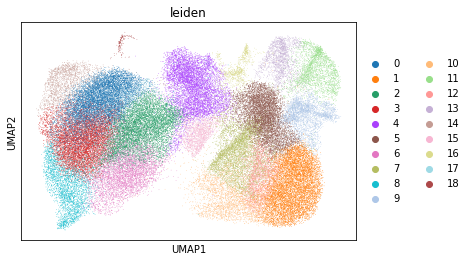

In [20]:
sc.pl.umap(adata,color='leiden')

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


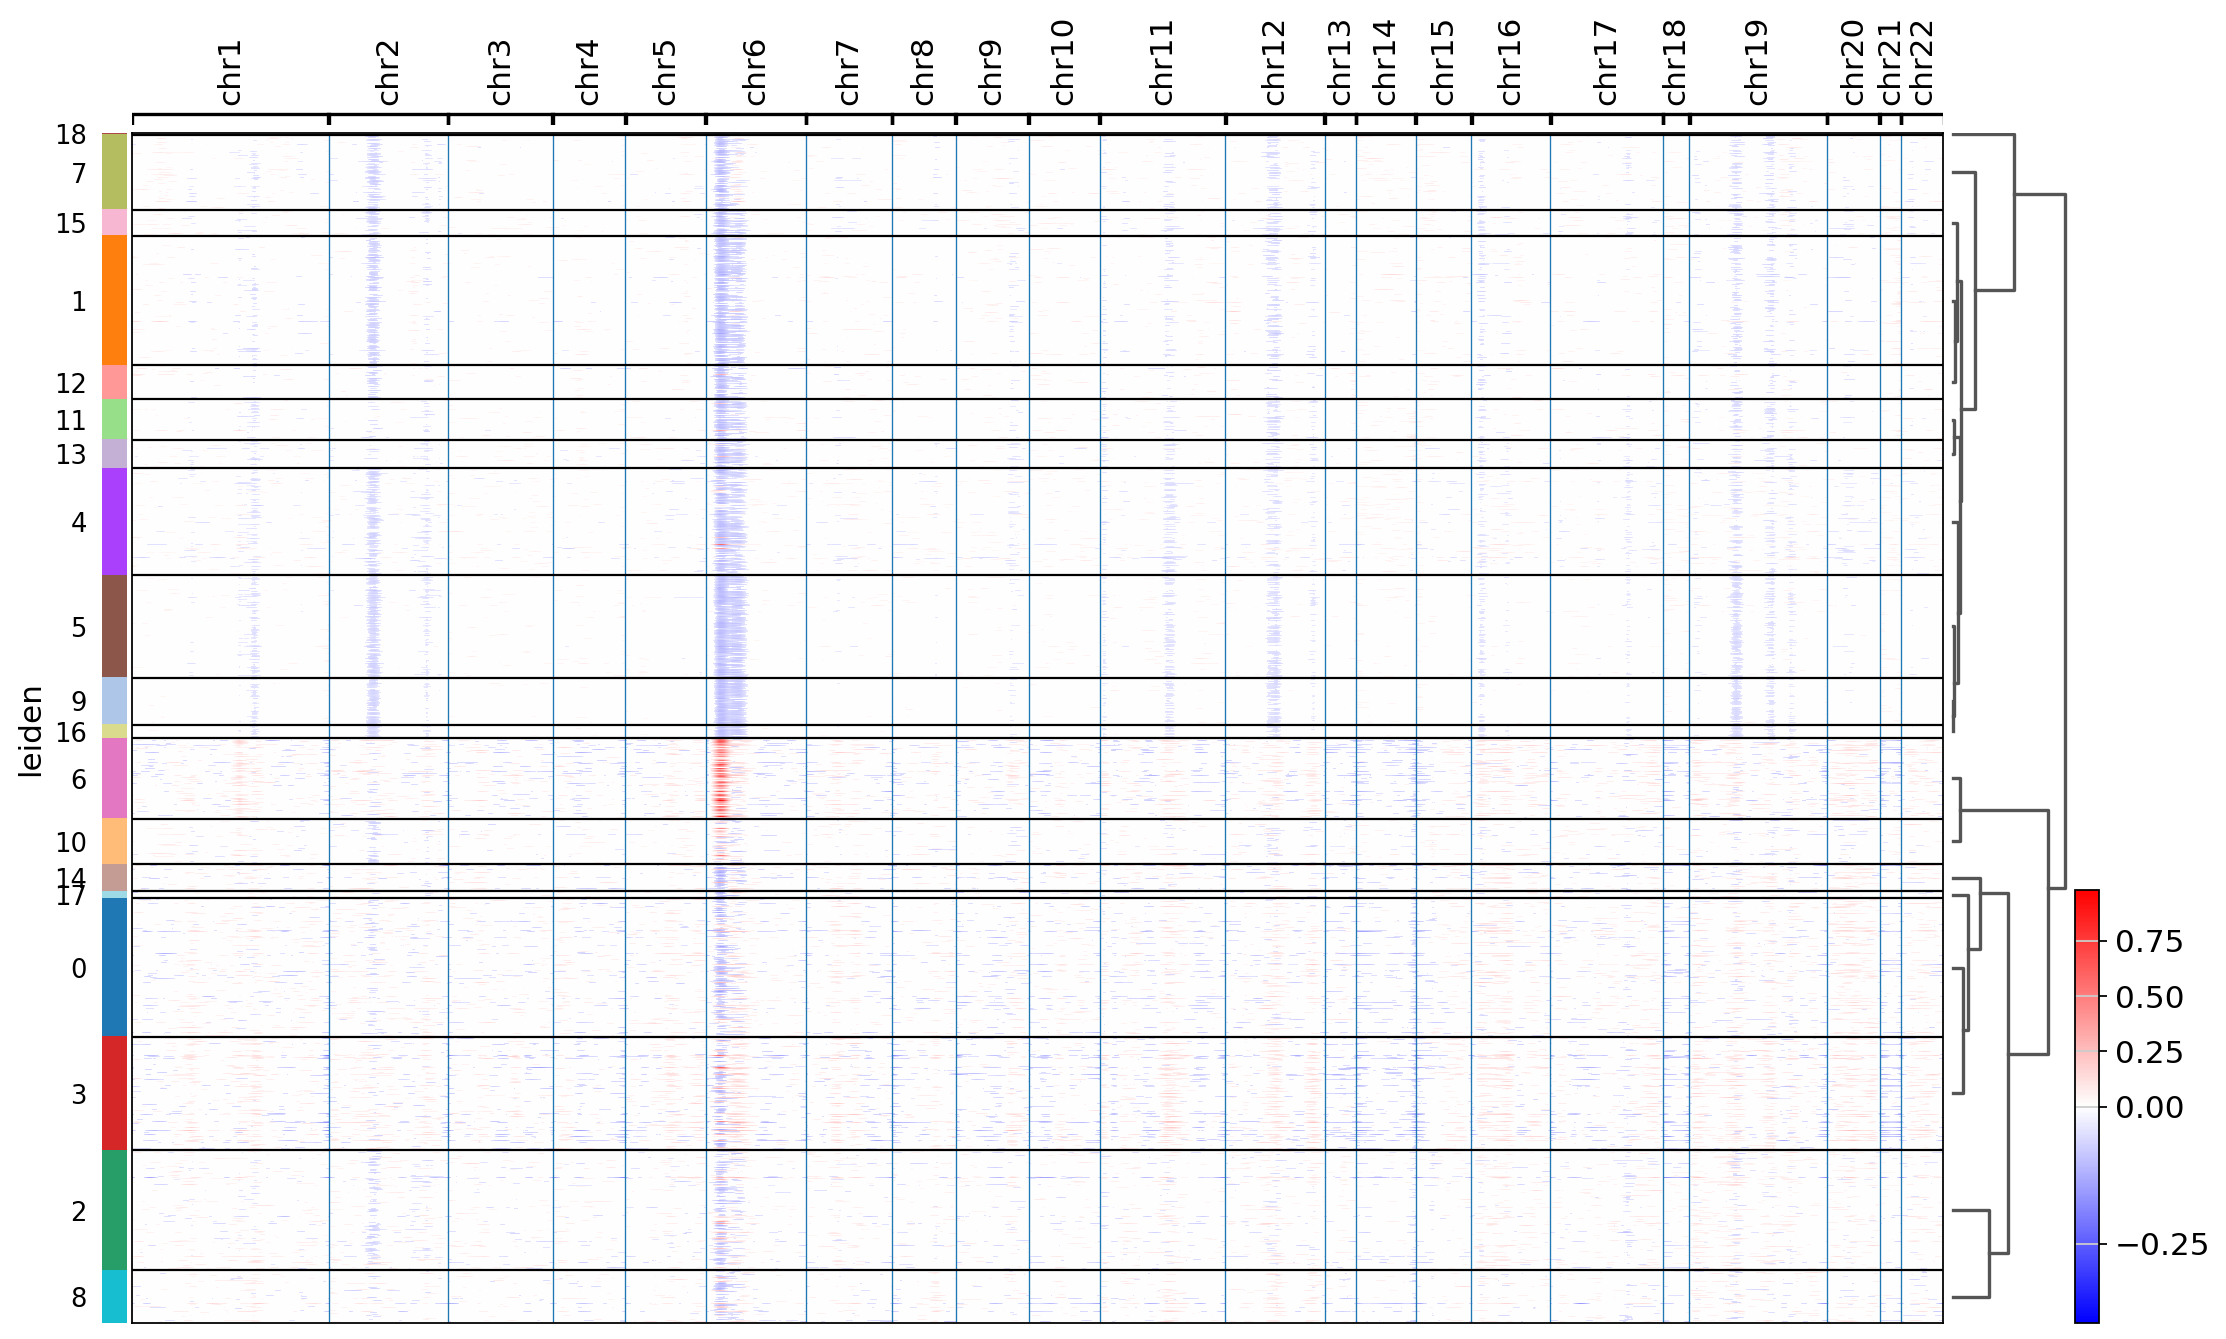

In [23]:
cnv.pl.chromosome_heatmap(adata, groupby="leiden", dendrogram=True)

In [24]:
import numpy as np
adata.obsm['spatial']=np.array(adata.obs.loc[:,['CenterX_global_px','CenterY_global_px']])

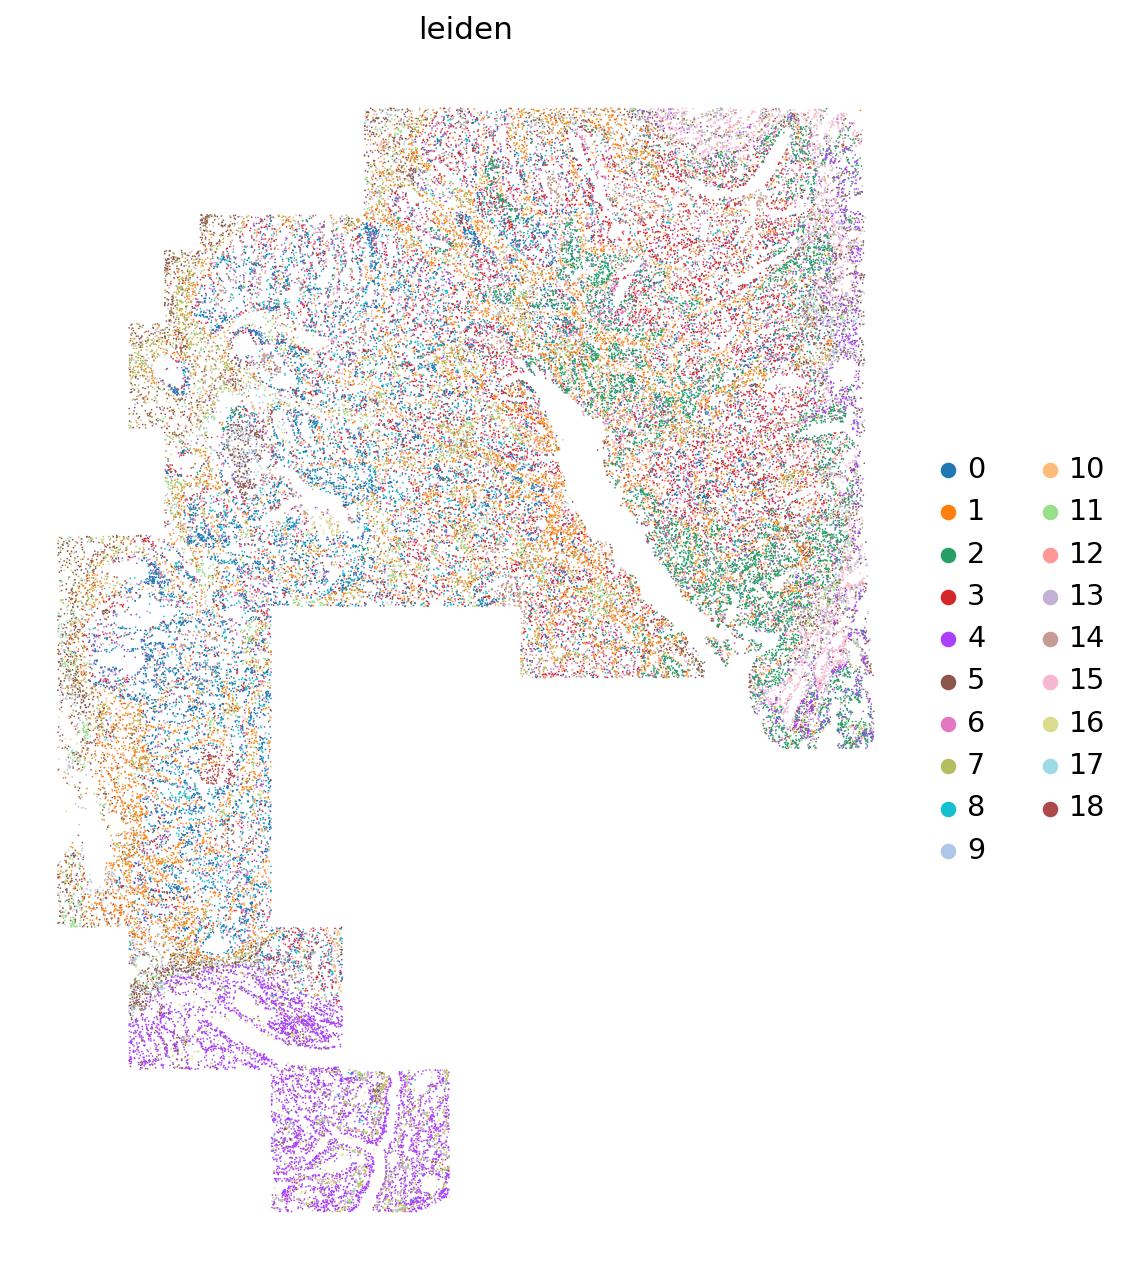

In [25]:
sc.settings.set_figure_params(figsize=(10, 10))
sc.pl.spatial(adata,color='leiden',spot_size=200,frameon=False)

In [26]:
np.mean(np.sum(adata.layers['raw'],axis=1))

447.99768

In [27]:
sc.tl.rank_genes_groups(adata,groupby='leiden')

/home/sergio/.local/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


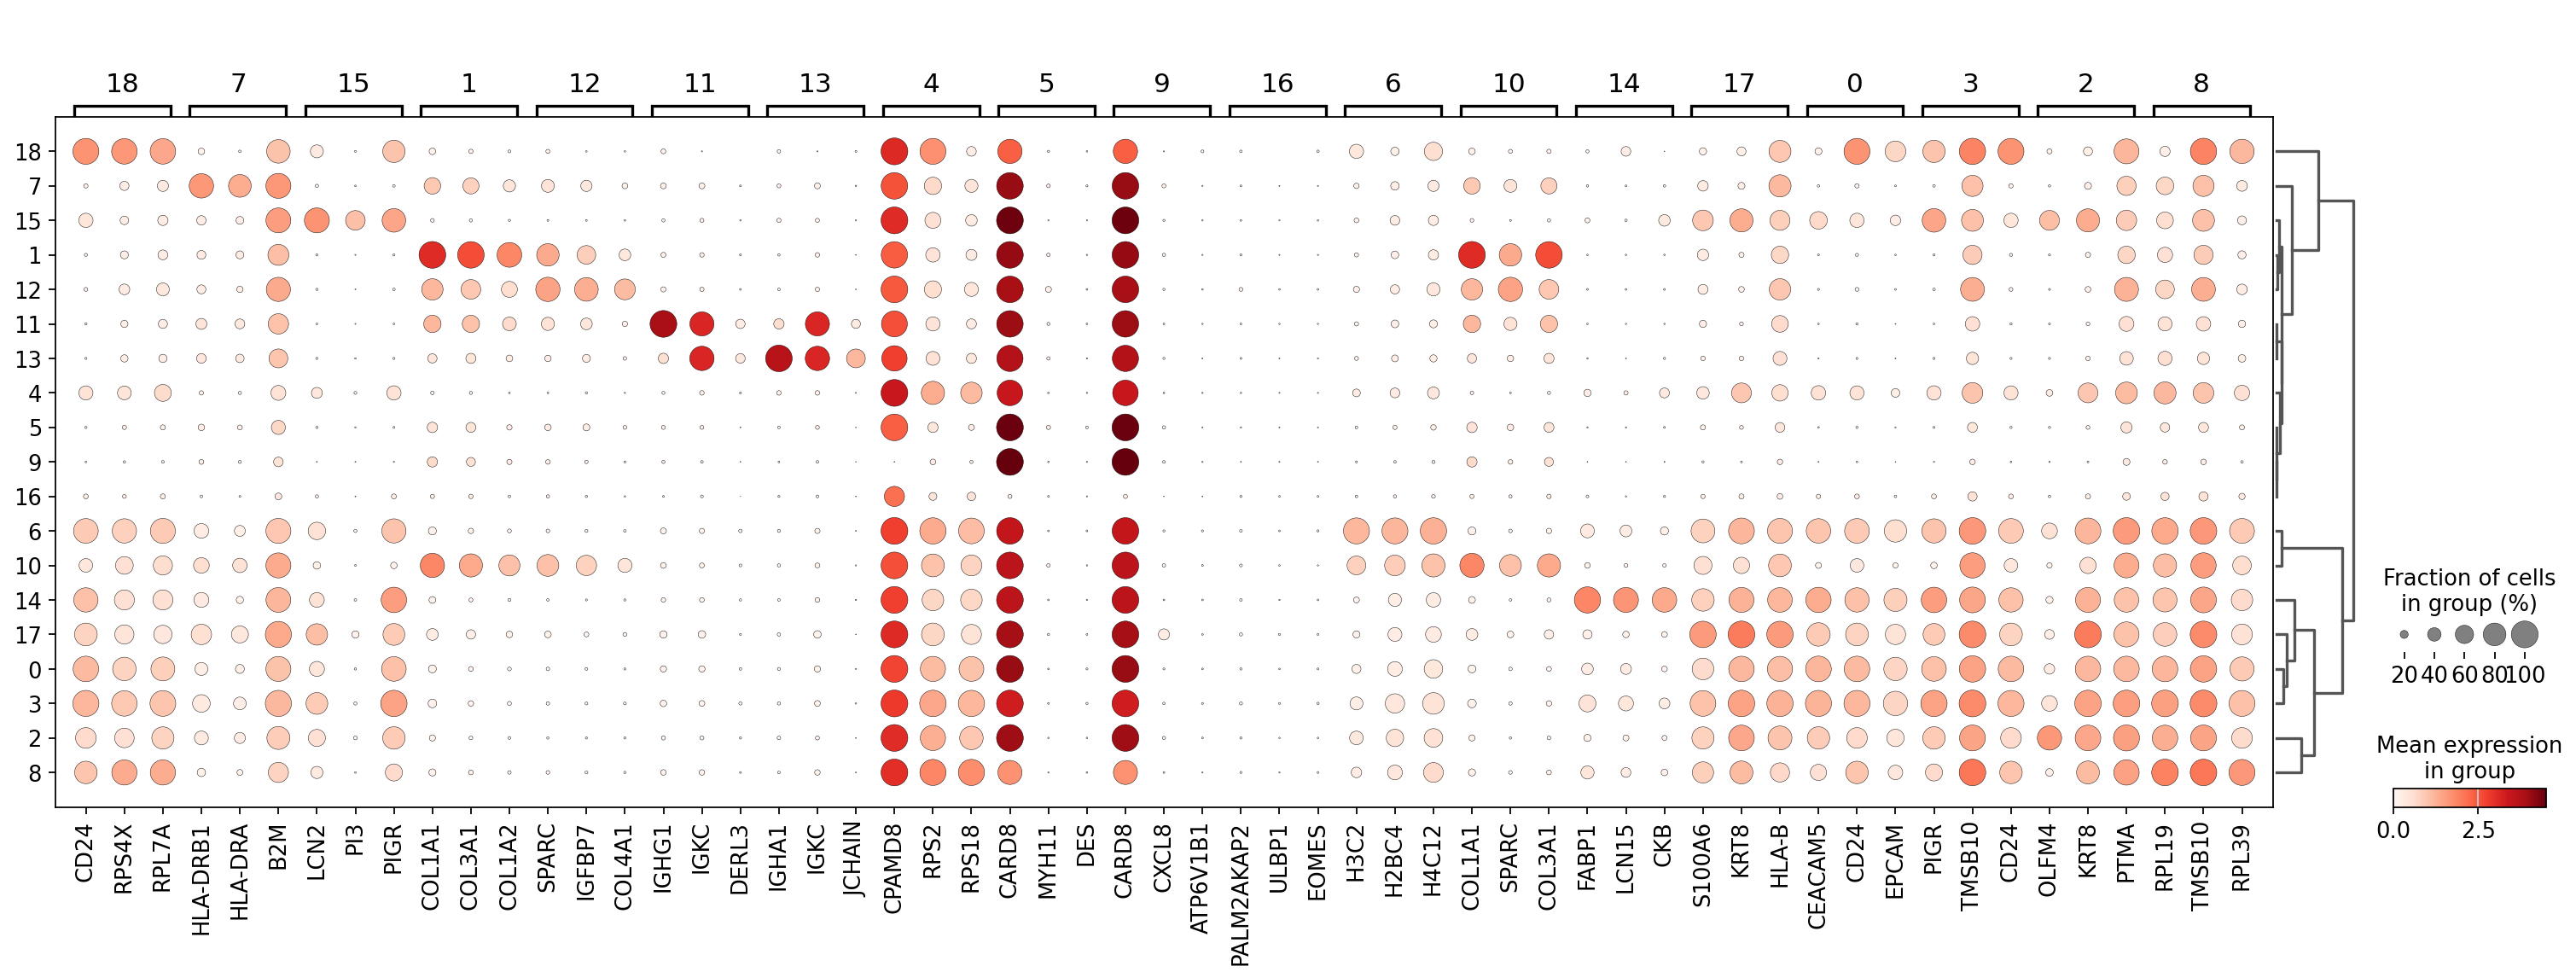

In [29]:
sc.settings.set_figure_params(figsize=(7, 7))
sc.pl.rank_genes_groups_dotplot(adata,n_genes=3)

In [48]:
cnv.tl.infercnv(adata, reference_key="leiden", reference_cat=['13','11','14'], window_size=200)

  0%|          | 0/15 [00:00<?, ?it/s]

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


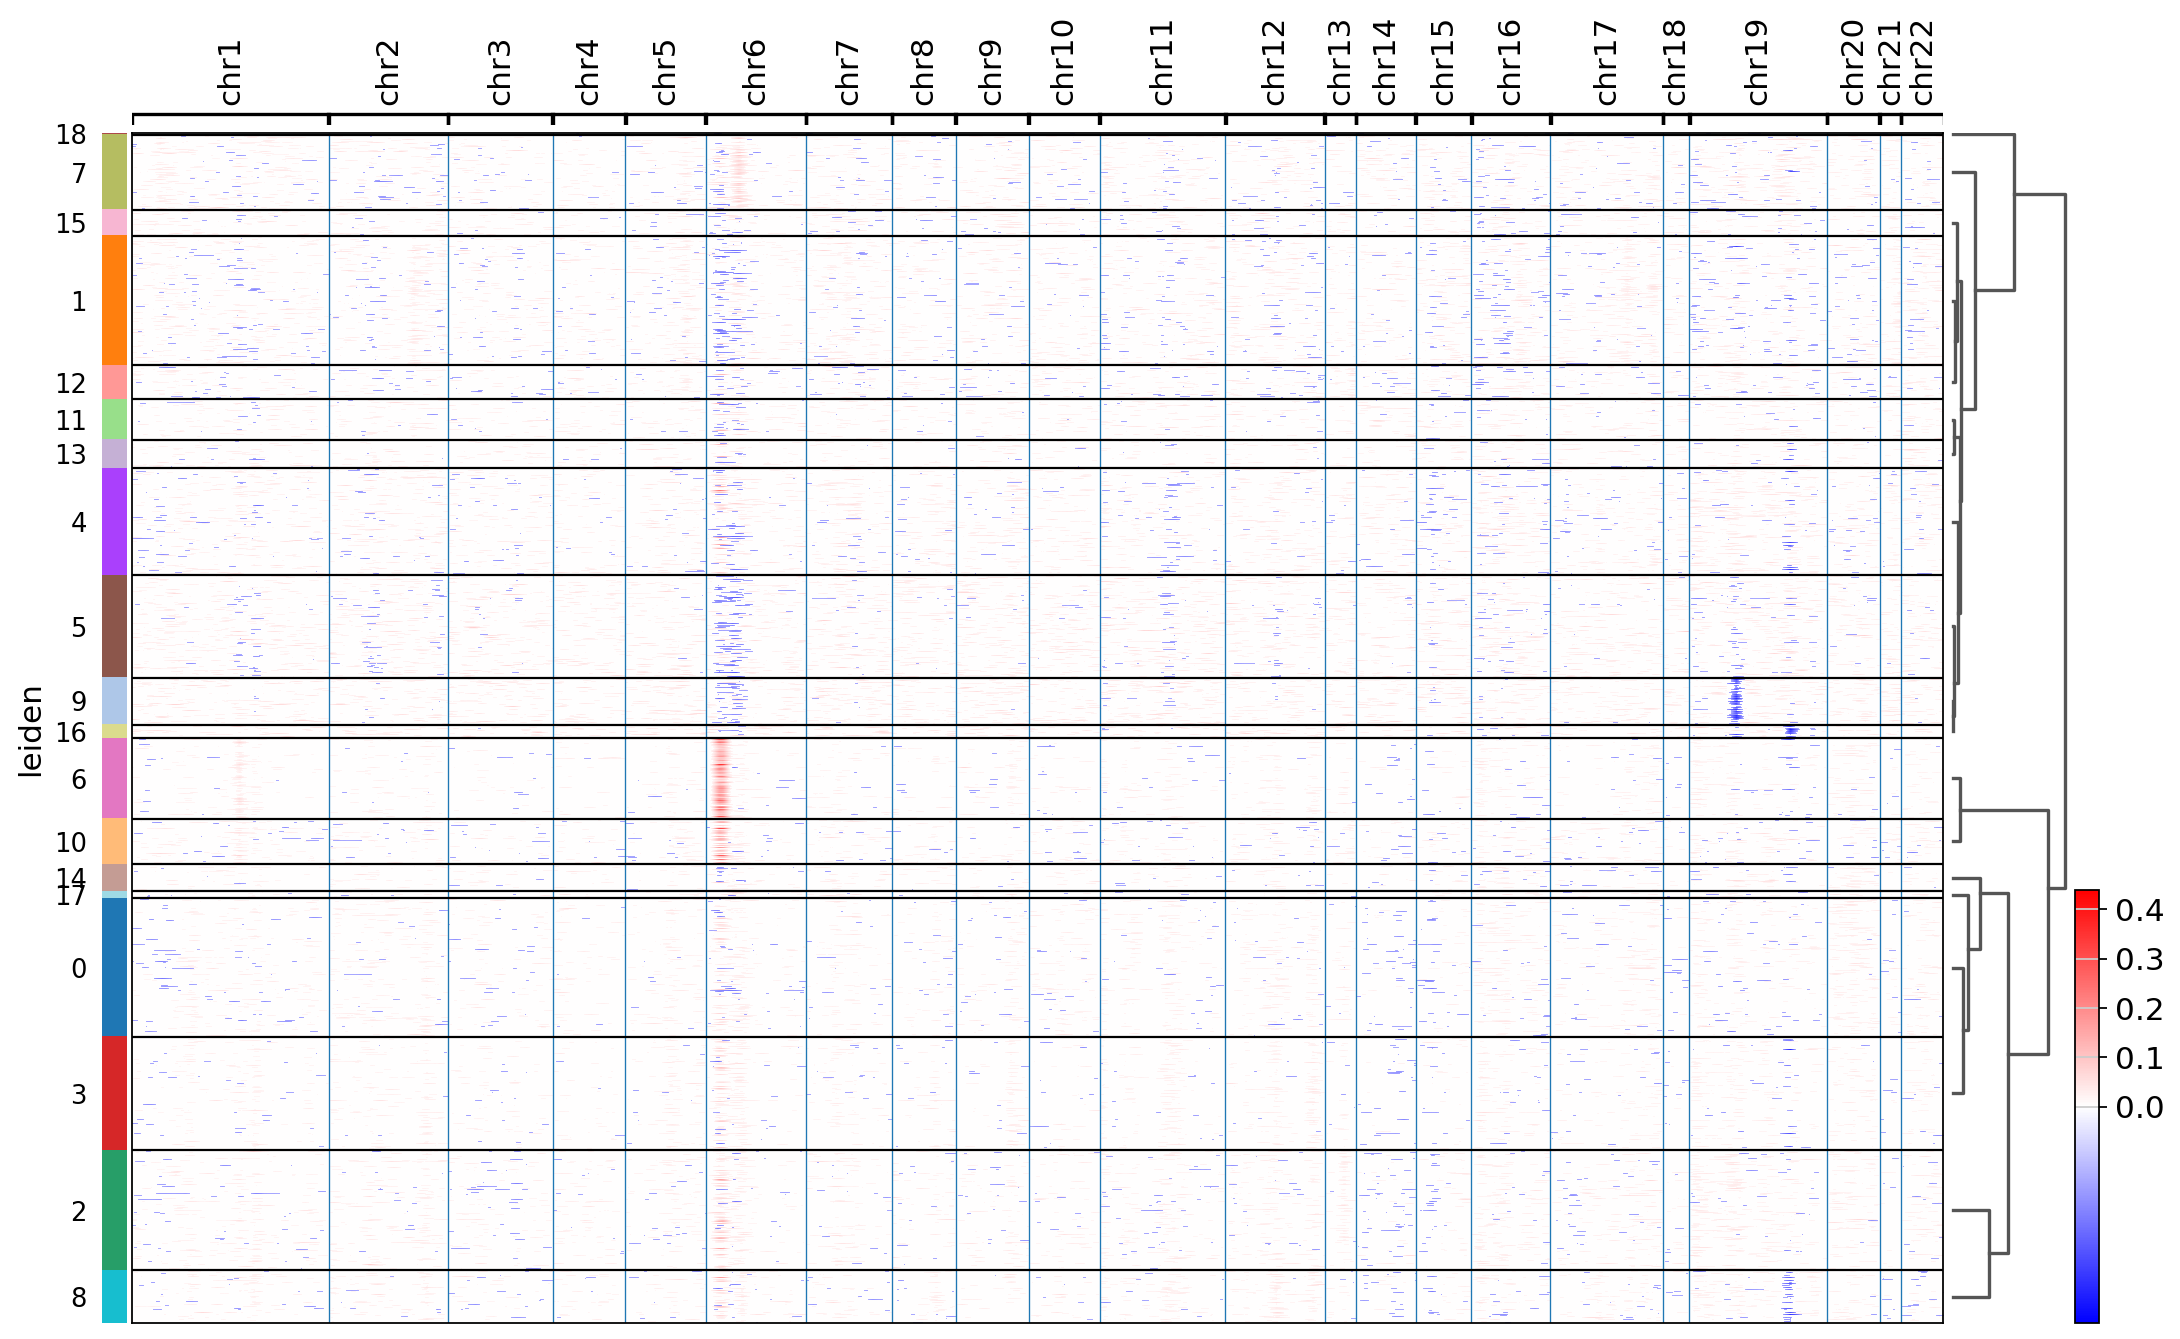

In [49]:
cnv.pl.chromosome_heatmap(adata, groupby="leiden", dendrogram=True)

In [57]:
adata.write('/media/sergio/Meninges/CosMx-WTx/WTx-CosMx/raw-B-1970164-01-04_2/adata_1970164_processed.h5ad')

In [50]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)

In [51]:
cnv.tl.leiden(adata,resolution=0.2)

/home/sergio/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


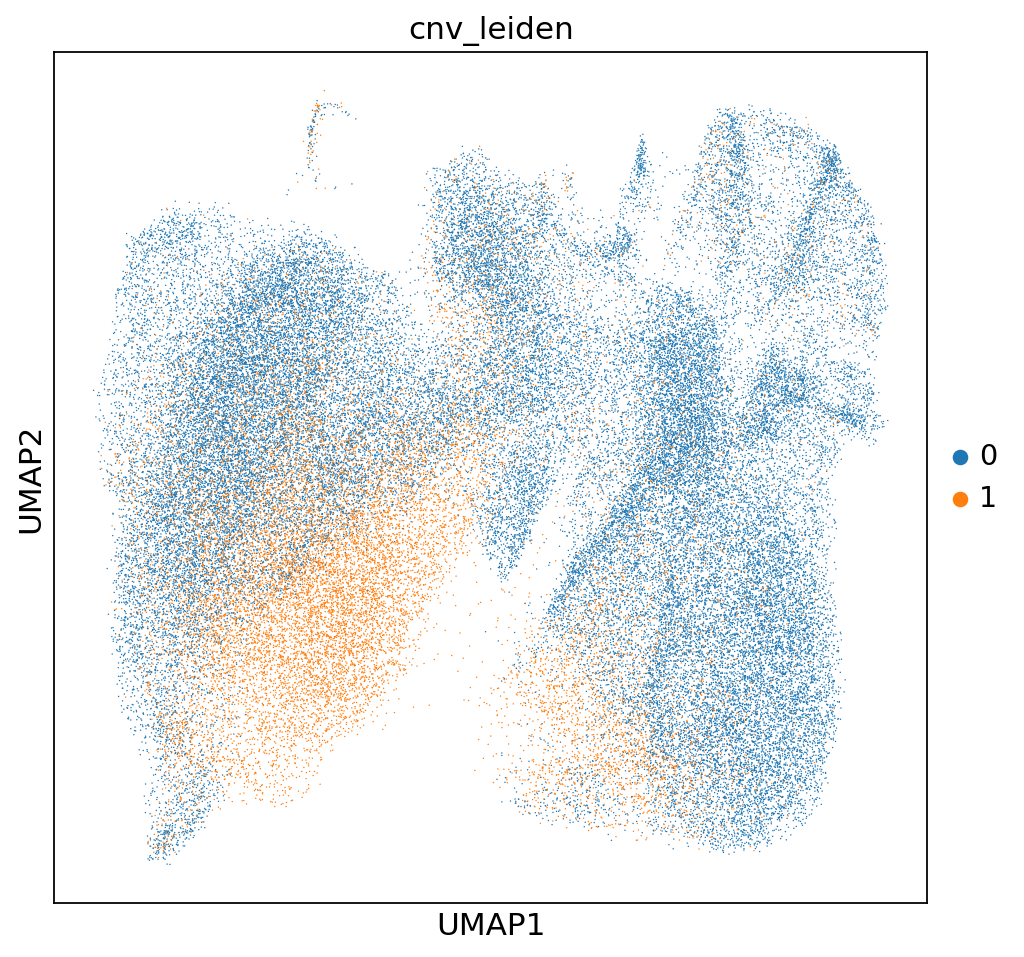

In [52]:
sc.pl.umap(adata,color='cnv_leiden')

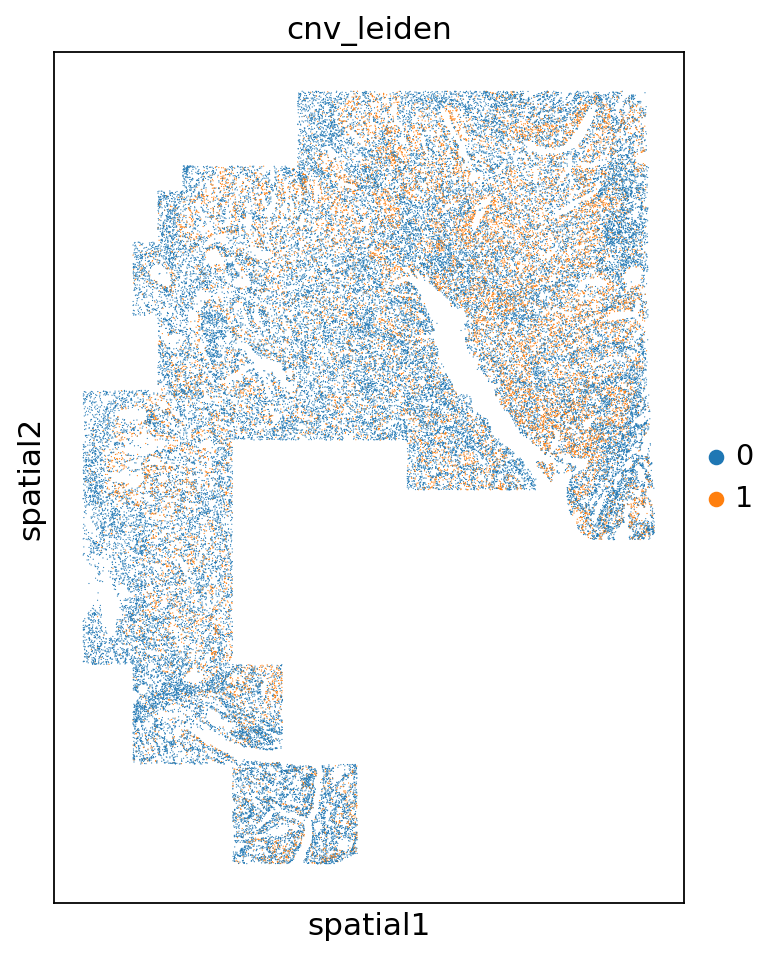

In [55]:
sc.pl.spatial(adata,color='cnv_leiden',spot_size=200)